In [1]:
import numpy as np
from sklearn.base import clone
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

sns.set()

In [2]:
def make_regression(func, n_elements, noise=0.0, random_state=None):
    rng = np.random.RandomState(random_state)
    x = rng.uniform(5.0, size=n_elements)
    n = rng.normal(scale=noise, size=n_elements)
    y = func(x) + n
    return x.reshape(-1, 1), y

def plot_regression_line(en, xb, yb, n=100):
    xx = np.linspace(*xb, n).reshape(-1, 1)
    yy = np.mean([c.predict(xx) for c in en], axis=0) 
    plt.plot(xx, yy, color='red', linewidth=20, alpha=0.3)

In [3]:
X, y = make_regression(lambda x: x**2 + 2*x, 1000, random_state=0, noise=5.0)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0, test_size=0.2)

In [4]:
names = ['Underfit', 'Right Fit', 'Overfit']
clfs = [
    SVR(kernel='linear'),
    SVR(kernel='poly', degree=2, gamma='auto'),
    SVR(kernel='rbf', gamma='auto')
]
ensembles = []

kfold = KFold(n_splits=5, shuffle=True, random_state=True)
for idx, clf in enumerate(clfs, 1):
    score = []
    ensemble = []
    for train_idx, dev_idx in kfold.split(train_X):
        split_train_X, split_train_y = train_X[train_idx], train_y[train_idx]
        split_dev_X, split_dev_y = train_X[dev_idx], train_y[dev_idx]
        clf = clone(clf)
        clf.fit(split_train_X, split_train_y)
        pred = clf.predict(split_dev_X)
        error = mean_squared_error(split_dev_y, pred)
        score.append(error)
        ensemble.append(clf)
    score = np.mean(error)
    print(f'Error for model#{idx}: {score}')
    ensembles.append(ensemble)

Error for model#1: 20.92711230081141
Error for model#2: 20.408284112067378
Error for model#3: 21.504182546298374


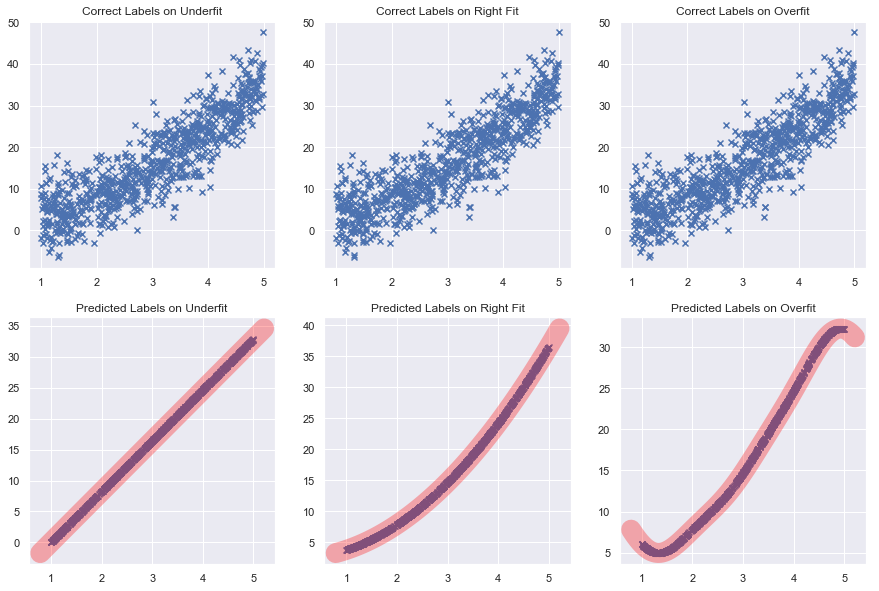

In [5]:
plt.figure(figsize=(15, 10))
for idx, (en, name) in enumerate(zip(ensembles, names), 1):
    pred = np.mean([c.predict(train_X) for c in en], axis=0) 
    plt.subplot(2, 3, idx)
    plt.title(f'Correct Labels on {name}')
    plt.scatter(train_X.ravel(), train_y, marker='x')
    plt.subplot(2, 3, idx+3)
    plt.title(f'Predicted Labels on {name}')
    plt.scatter(train_X.ravel(), pred, marker='x')
    plot_regression_line(en, plt.xlim(), plt.ylim())
plt.show()

In [7]:
print('Error on Test Set')
for idx, en in enumerate(ensembles, 1):
    pred = np.mean([c.predict(test_X) for c in en], axis=0) 
    error = mean_squared_error(test_y, pred)
    print(f'Error for model#{idx}: {error}')

Error on Test Set
Error for model#1: 26.222318208371753
Error for model#2: 23.56889801953702
Error for model#3: 24.69508605672736
